### === Task 1 ===

1. Load the sklearn breast cancer dataset.  Perform SVC with cross-validation of leaveOneOut.

In [1]:
# Load dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import svm

X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

#define model
model = svm.SVC(kernel='rbf')
model1 = svm.SVC(kernel='poly')
model2 = svm.SVC(kernel='linear')

list_models = [model, model1, model2]
score_models = []

# CV
from sklearn.model_selection import LeaveOneOut, cross_val_score
for model in list_models:
    scores = cross_val_score(model, X_train, y_train, cv=LeaveOneOut())
    score_models.append(scores.mean())
    
print(score_models, list_models)

[0.9225352112676056, 0.9154929577464789, 0.9460093896713615] [SVC(), SVC(kernel='poly'), SVC(kernel='linear')]


### === Task 2 ===

1. Load the sklearn boston dataset.  Extract the RAD feature as your single feature for your X with the normal y.   Using a validation curve to test different polynomials and identify the optimal polynomial order for the regression.  

In [2]:
# Load dataset
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
boston.keys()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
X = boston.data[:,8].reshape(-1,1)
y = boston.target

In [4]:
# Train Test Split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)

(379, 1) (379,)
(127, 1) (127,)


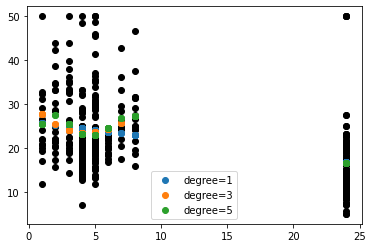

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt 

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

plt.scatter(Xtrain.ravel(), ytrain, color='black')
axis = plt.axis()

for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(Xtrain, ytrain).predict(Xtest)
    plt.scatter(Xtest.ravel(), y_test, label='degree={0}'.format(degree))
plt.legend(loc='best')

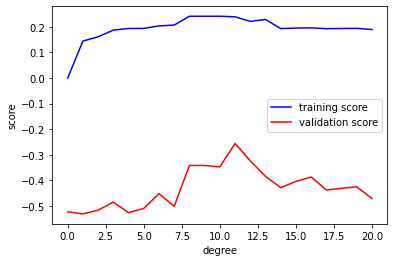

In [6]:
from sklearn.model_selection import validation_curve
import numpy as np
degree = np.arange(0, 21)

train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          param_name='polynomialfeatures__degree', param_range= degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel('degree')
plt.ylabel('score');

### === Task 3 ===

1. Load the sklearn boston dataset.  Extract the RAD feature as your single feature for your X with the normal y.   Using a learning curve to test polynomial of 2 and 9.  Check whether you found the same phenemonon as above.  How much sample is enough for 2 and 9?

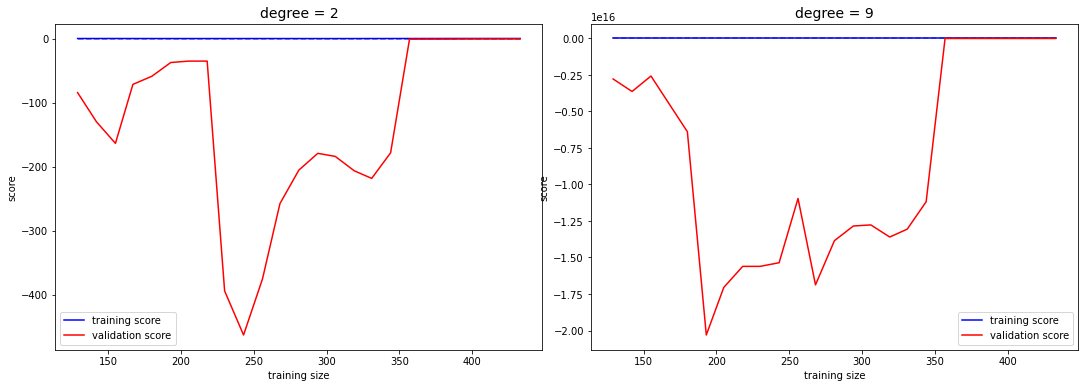

In [7]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    #ax[i].set_ylim(0, 1)
    #ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

### === Task 4 ===

1. Load the sklearn boston dataset.  Extract the RAD feature as your single feature for your X with the normal y.   Use the grid search to identify the best polynomial order to use for prediction.  Then perform the prediction using the <code>grid_best_estimator_</code>

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

X, y = load_boston(return_X_y=True)
X = X[:, 8].reshape(-1, 1)  #the RAD feature; reshape to (m, 1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [24]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [25]:
PolynomialRegression()  #to get the name for inputting into the param_grid; only needed if you use pipeline

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [28]:
param_grid = {'polynomialfeatures__degree': np.arange(21),}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(Xtrain, ytrain)
grid.best_params_

{'polynomialfeatures__degree': 5}

In [29]:
model = grid.best_estimator_

y_model = model.fit(Xtrain, ytrain).predict(Xtest)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(ytest, y_model)
r2 = r2_score(ytest, y_model)
print("MSE: ", MSE)
print("r2: ", r2)

MSE:  34.566391206595235
r2:  0.6510506374124212
